In [1]:
"""
@author: Vincent Maillou (vmaillou@iis.ee.ethz.ch)
@author: Lisa Gaedke-Merzhaeuser  (lisa.gaedke.merzhaeuser@usi.ch)
@date: 2023-11

Tests for cholesky selected solving routines.

Copyright 2023 ETH Zurich and USI. All rights reserved.
"""

from sdr.utils import matrix_generation
from sdr.cholesky.cholesky_decompose import chol_dcmp_tridiag_arrowhead
from sdr.cholesky.cholesky_solve import chol_slv_tridiag_arrowhead

from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags_arrowhead
from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags


import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

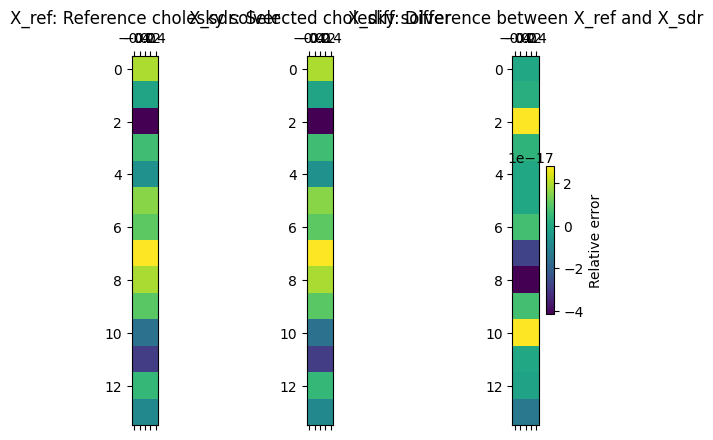

In [2]:
nblocks = 5
diag_blocksize = 3
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag_arrowhead(
    nblocks, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, 
    seed
)

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_ndiags_arrowhead(A, nblocks, diag_blocksize, arrow_blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)


# --- Solving ---

#X_ref = la.cho_solve((L_ref, True), B)
# Is equivalent to..
Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)

fig, ax = plt.subplots(1, 3)
ax[0].set_title("X_ref: Reference cholesky solver")
ax[0].matshow(X_ref)

X_sdr = chol_slv_tridiag_arrowhead(L_sdr, B, diag_blocksize, arrow_blocksize)
ax[1].set_title("X_sdr: Selected cholesky solver")
ax[1].matshow(X_sdr)

X_diff = X_ref - X_sdr
ax[2].set_title("X_diff: Difference between X_ref and X_sdr")
ax[2].matshow(X_diff)
fig.colorbar(ax[2].matshow(X_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()

In [3]:
nblocks = 5
diag_blocksize = 3
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag_arrowhead(nblocks, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, seed)

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_tridiag_arrowhead(A, diag_blocksize, arrow_blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

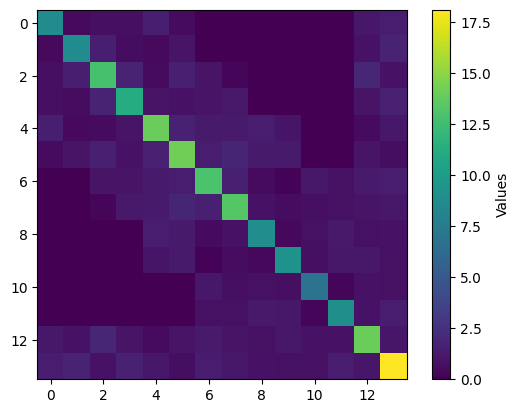

In [4]:
nblocks = 7
ndiags = 5
diag_blocksize = 2
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_ndiags_arrowhead(nblocks, ndiags, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, seed)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_ndiags_arrowhead(A, nblocks, diag_blocksize, arrow_blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

# --- Solving ---

#X_ref = la.cho_solve((L_ref, True), B)
# Is equivalent to..
Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)


In [5]:
from sdr.utils import matrix_generation
from sdr.cholesky.cholesky_decompose import chol_dcmp_tridiag
from sdr.cholesky.cholesky_solve import chol_slv_tridiag

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pl
    
    
nblocks = 5
blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag(
    nblocks, blocksize, symmetric, diagonal_dominant, seed
)

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_tridiag(A, blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

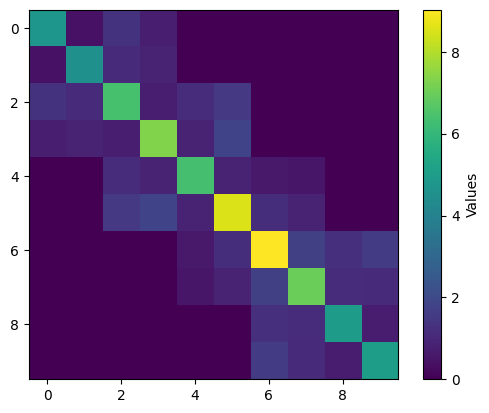

In [6]:
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

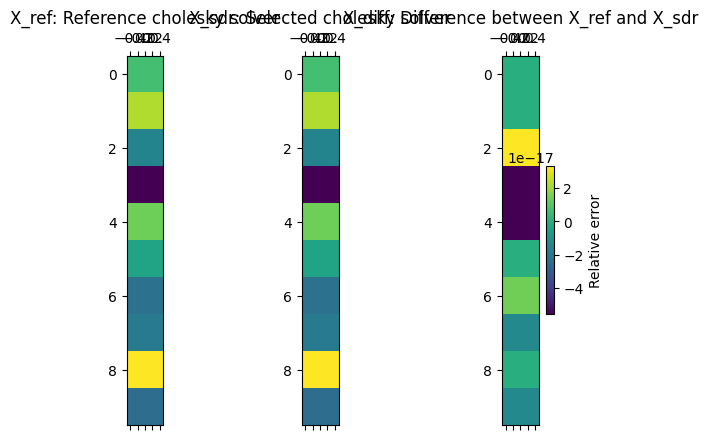

In [7]:
X_ref = la.cho_solve((L_ref, True), B)
# Is equivalent to..
# Y_ref = la.solve_triangular(L_ref, B, lower=True)
# X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)

fig, ax = plt.subplots(1, 3)
ax[0].set_title("X_ref: Reference cholesky solver")
ax[0].matshow(X_ref)

X_sdr = chol_slv_tridiag(L_sdr, B, blocksize)
ax[1].set_title("X_sdr: Selected cholesky solver")
ax[1].matshow(X_sdr)

X_diff = X_ref - X_sdr
ax[2].set_title("X_diff: Difference between X_ref and X_sdr")
ax[2].matshow(X_diff)
fig.colorbar(ax[2].matshow(X_diff), ax=ax[2], label="Relative error", shrink=0.4)

plt.show()

In [8]:
from sdr.cholesky.cholesky_solve import chol_slv_ndiags

Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)

X_sdr_ndiags = chol_slv_ndiags(L_sdr, B, blocksize, 3)

print("norm(x - x_ref) = ", np.linalg.norm(X_sdr_ndiags - X_ref))


norm(x - x_ref) =  4.291468873614597e-17


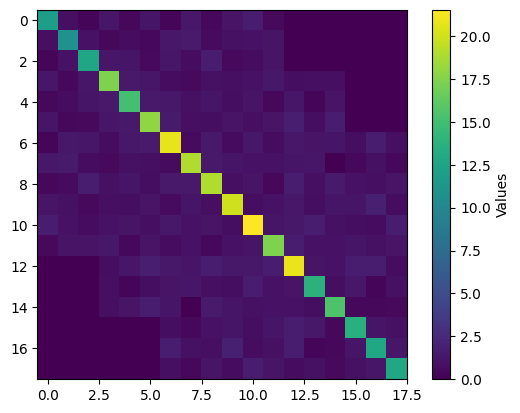

norm(x - x_ref) =  3.539218529896437e-17


In [9]:
from sdr.cholesky.cholesky_solve import chol_slv_ndiags

nblocks = 6
ndiags = 7
blocksize = 3
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_block_ndiags(nblocks, ndiags, blocksize, symmetric, diagonal_dominant, seed)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_ndiags(A, ndiags, blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)

X_sdr_ndiags = chol_slv_ndiags(L_sdr, B, blocksize, ndiags)

print("norm(x - x_ref) = ", np.linalg.norm(X_sdr_ndiags - X_ref))


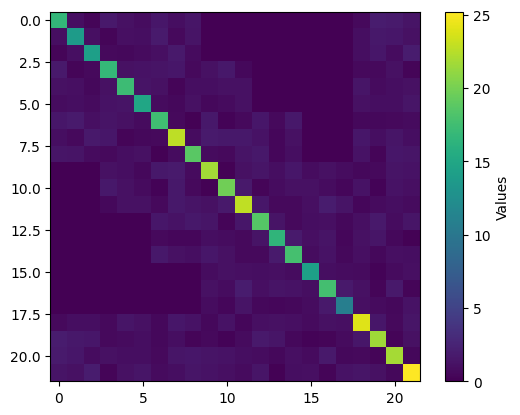

norm(x - x_ref) =  4.1177421864416186e-17


In [10]:
from sdr.cholesky.cholesky_solve import chol_slv_ndiags_arrowhead


nblocks = 7
ndiags = 5
diag_blocksize = 3
arrow_blocksize = 4
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_ndiags_arrowhead(nblocks, ndiags, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, seed)

plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Values')
plt.show()

L_ref = la.cholesky(A, lower=True)
L_sdr = chol_dcmp_ndiags_arrowhead(A, ndiags, diag_blocksize, arrow_blocksize)

n_rhs = 1
B = np.random.randn(A.shape[0], n_rhs)

Y_ref = la.solve_triangular(L_ref, B, lower=True)
X_ref = la.solve_triangular(L_ref.T, Y_ref, lower=False)

X_sdr_ndiags_ah = chol_slv_ndiags_arrowhead(L_sdr, B, ndiags, diag_blocksize, arrow_blocksize)

print("norm(x - x_ref) = ", np.linalg.norm(X_sdr_ndiags_ah - X_ref))


In [15]:
#B = np.random.randn(A.shape[0], n_rhs)

B = np.random.randn(4,2)
print(B)

# in python B[0:n] will give all columns of those rows
print("test")
print(B[0:2])

[[ 2.32309314 -0.18146103]
 [ 0.4148512   0.40937839]
 [ 1.3583346  -0.17353423]
 [ 0.56859017 -0.25167185]]
test
[[ 2.32309314 -0.18146103]
 [ 0.4148512   0.40937839]]
